In [22]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [23]:
all_df = pd.read_csv("data2.csv")

In [24]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [25]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [26]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [27]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [28]:
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [30]:
model = Sequential()

In [31]:
model.add(Conv1D(filters=140*2,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(70,1), 
                 activation='relu'))

In [32]:
model.add(MaxPooling1D(pool_size=1))

In [33]:
model.add(Conv1D(filters=140,
                 kernel_size=1,
                 padding='valid',               
                 activation='relu'))

In [34]:
model.add(MaxPooling1D(pool_size=1))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(70, activation='tanh'))

In [37]:
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 70, 280)           560       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 70, 280)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 70, 140)           39340     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 70, 140)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 70)                686070    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 71        
Total para

In [39]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/30
62752/62752 [==============================] - 120s 2ms/step - loss: 0.6631 - acc: 0.6021 - val_loss: 0.6534 - val_acc: 0.6099
Epoch 2/30
62752/62752 [==============================] - 126s 2ms/step - loss: 0.6511 - acc: 0.6199 - val_loss: 0.6528 - val_acc: 0.6156
Epoch 3/30
62752/62752 [==============================] - 107s 2ms/step - loss: 0.6513 - acc: 0.6202 - val_loss: 0.6506 - val_acc: 0.6167
Epoch 4/30
62752/62752 [==============================] - 106s 2ms/step - loss: 0.6505 - acc: 0.6213 - val_loss: 0.6511 - val_acc: 0.6167
Epoch 5/30
62752/62752 [==============================] - 106s 2ms/step - loss: 0.6502 - acc: 0.6215 - val_loss: 0.6507 - val_acc: 0.6169


In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

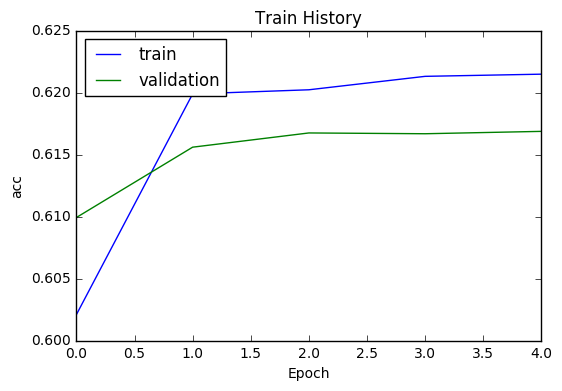

In [42]:
show_train_history(train_history,'acc','val_acc')

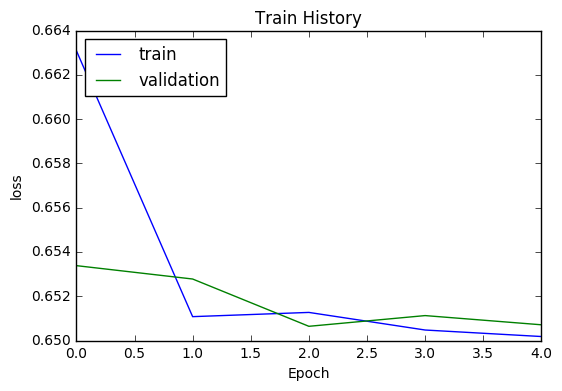

In [43]:
show_train_history(train_history,'loss','val_loss')

In [44]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 12s 599us/step


In [45]:
scores[1]

0.6220488501199315